In [1]:
import re
import unicodedata
import pandas as pd
import nltk

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

label                                               text
id                                                         
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [2]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [7]:
df[df.label == "spam"].shape

(747, 2)

In [6]:
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [3]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

n   percent
ham   4825  0.865937
spam   747  0.134063

In [9]:
def show_counts_and_ratios(df, column):
    """
    
    """
    
    labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")

n   percent
ham   4825  0.865937
spam   747  0.134063

In [10]:
print(type(df.text))
df.text.dtypes

<class 'pandas.core.series.Series'>


dtype('O')

In [12]:
name_parts = "jane janeway".split()

In [13]:
"_".join(name_parts)

'jane_janeway'

In [14]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [41]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [15]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [16]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [17]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

all  ham  spam
0               3    0     3
008704050406    2    0     2
0089my          1    0     1
0121            1    0     1
01223585236     1    0     1

In [18]:
word_counts.tail(20)

all  ham  spam
yunny        2    2     0
yuo          4    4     0
yuou         1    1     0
yup         43   43     0
yupz         1    1     0
ywhere       1    1     0
z            1    1     0
zac          1    1     0
zahers       1    1     0
zealand      1    1     0
zebra        1    0     1
zed          6    0     6
zero         1    1     0
zhong        1    1     0
zindgi       1    1     0
zoe          2    1     1
zogtorius    1    1     0
zoom         1    1     0
zouk         1    0     1
zyada        1    1     0

In [19]:
word_counts.sort_values(by='all', ascending=False).head(10)

all  ham  spam
call  600  241   359
im    462  449    13
get   397  314    83
ur    384  240   144
go    304  273    31
4     287  168   119
dont  279  257    22
ok    277  272     5
free  275   59   216
know  267  241    26

In [20]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])

all  ham  spam
thats        94   94     0
i_          117  117     0
say         118  118     0
da          132  132     0
later       134  134     0
lor         160  160     0
awarded      38    0    38
18           43    0    43
guaranteed   50    0    50
tone         73    0    73
prize        94    0    94
claim       115    0   115

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

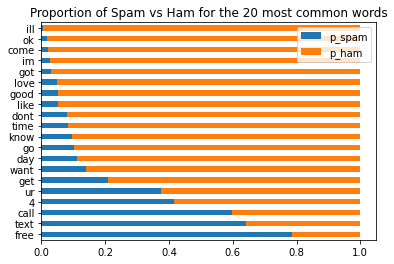

In [22]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 30 most common words')

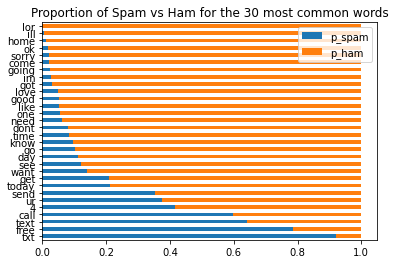

In [24]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(30)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 30 most common words')

In [25]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

all  ham  spam      ratio
im       462  449    13   0.028953
good     235  223    12   0.053809
like     245  232    13   0.056032
need     182  171    11   0.064324
dont     279  257    22   0.085600
contact   70   14    56   3.997145
win       76   15    61   4.063957
cash      74   12    62   5.162365
mobile   150   15   135   8.994004
txt      163   13   150  11.529593

(-0.5, 399.5, 199.5, -0.5)

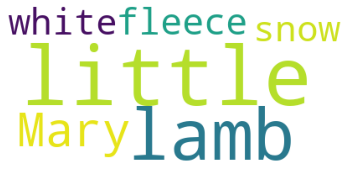

In [26]:
from wordcloud import WordCloud

sentence = 'Mary had a little lamb, little lamb, little lamb. Its fleece was white as snow.'

img = WordCloud(background_color='white').generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')

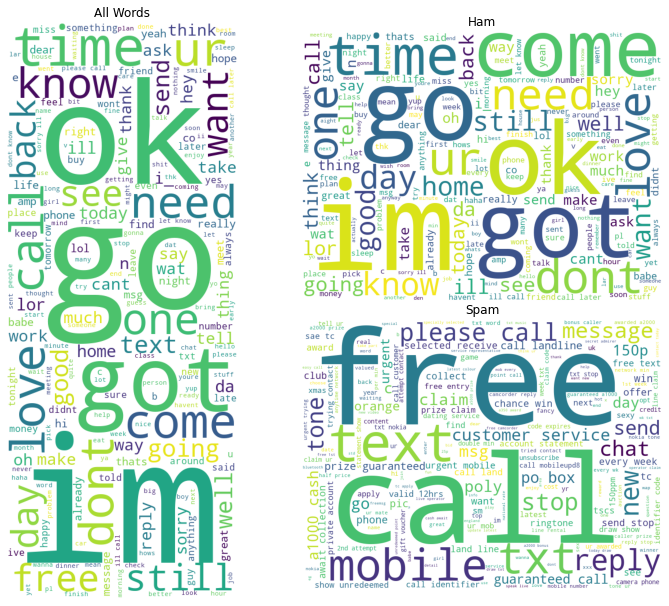

In [27]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

## Bigrams

In [28]:

sentence = 'Mary had a little lamb'

bigrams = nltk.ngrams(sentence.split(), 2)
list(bigrams)

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

In [30]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head(10)

#outputs a tuple: a list that can't change, denoted with () rather than []

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(pls, send)        22
dtype: int64

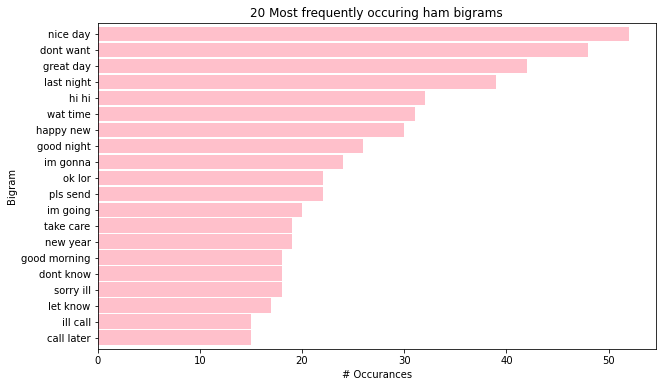

In [31]:
top_20_ham_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1]) #handles the concatinating of the tuples
_ = plt.yticks(ticks, labels)

In [32]:
type(ham_words)

list

In [35]:
def show_frequent_ngram(list_of_strings, n):
    """
    
    """
    top_20_ngrams = (pd.Series(nltk.ngrams(list_of_strings, n))
                      .value_counts()
                      .head(20))
    
    top_20_ngrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

    plt.title(f'20 Most frequently occuring {n}-grams')
    plt.ylabel(f'{n}-gram')
    plt.xlabel('# Occurances')
    
    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_ngrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1]) #handles the concatinating of the tuples
    _ = plt.yticks(ticks, labels)

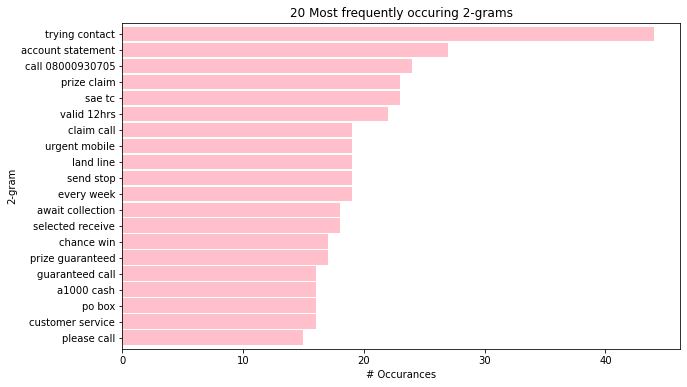

In [36]:
show_frequent_ngram(spam_words, 2)

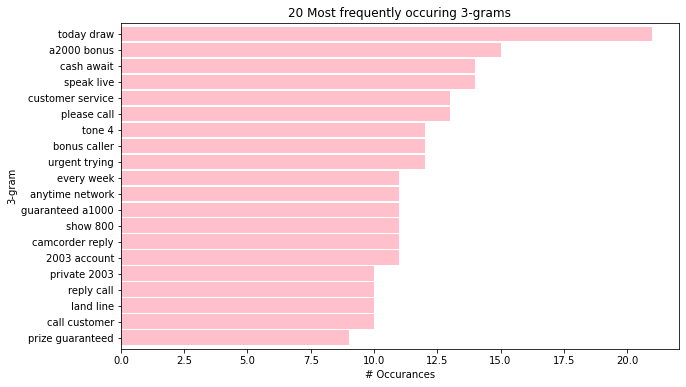

In [37]:
show_frequent_ngram(spam_words, 3)

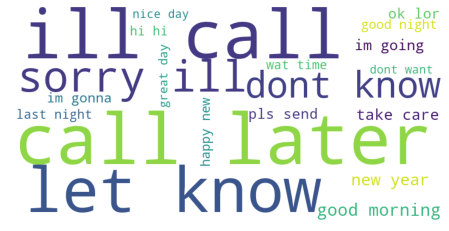

In [38]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
from nltk import tokenize
lines_list = tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)